# Telco Customer Churn

Dataset source: https://www.kaggle.com/blastchar/telco-customer-churn

## Framing the Problem
Supervised Classification -> predict if a customer will churn or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", 500)

## Getting the data

In [2]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Investigating the data structure

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


TotalCharges column has some empty cells, so it's treated as an object (string). Let's replace these empty cells with NaNs and cast to float

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan, regex=False).astype(float)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


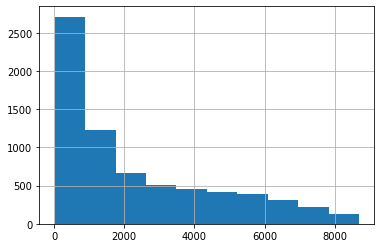

In [8]:
df["TotalCharges"].hist()

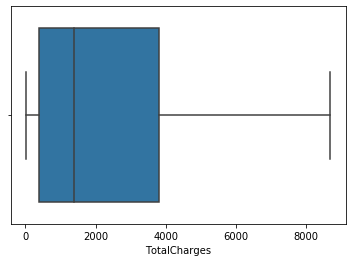

In [9]:
sns.boxplot(df["TotalCharges"])

In [10]:
df["TotalCharges"] = df["TotalCharges"].apply(lambda x: np.log1p(x))

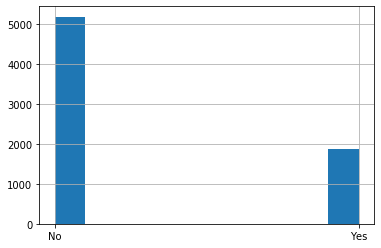

In [11]:
df["Churn"].hist()

In [12]:
df["Churn"].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [13]:
map_labels = {"No": 0,
              "Yes": 1}

df["Churn"] = df["Churn"].map(map_labels)

In [14]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df = df.drop(columns=["customerID"])

## Creating a test set

Stratified sampling because the target is not balanced

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=23)
for train_index, test_index in split.split(df, df["Churn"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [17]:
strat_train_set["Churn"].value_counts(normalize=True)

0    0.734647
1    0.265353
Name: Churn, dtype: float64

In [18]:
strat_test_set["Churn"].value_counts(normalize=True)

0    0.734564
1    0.265436
Name: Churn, dtype: float64

In [19]:
X_train = strat_train_set.drop("Churn", axis=1)
y_train = strat_train_set["Churn"].copy()

In [20]:
y_train.head()

395     0
527     0
2589    1
3945    1
2370    0
Name: Churn, dtype: int64

## Looking for correlations

In [21]:
X_train.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.010018,0.221122,0.094799
tenure,0.010018,1.000000,0.251579,0.834783
MonthlyCharges,0.221122,0.251579,1.000000,0.576048
TotalCharges,0.094799,0.834783,0.576048,1.000000


- Tenure seems to be highly positive correlated with TotalCharges
- MonthlyCharges and TotalCharges also have moderate positive correlation

In [22]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
395,Female,0,No,No,66,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.05,8.693991
527,Male,0,Yes,Yes,58,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,No,One year,Yes,Credit card (automatic),94.70,8.599943
2589,Male,1,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.05,5.450180
3945,Female,0,No,No,3,No,No phone service,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Mailed check,34.25,4.944139
2370,Male,0,Yes,No,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),112.55,8.962840


In [23]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

### Creating the preprocessing pipeline
- It's a good practice to scale the numerical features
- We will encode the categorical features using OneHotEncoder. Keep in mind that this introduces multicollinearity, which can be an issue for certain methods (for instance, methods that require matrix inversion). If features are highly correlated, matrices are computationally difficult to invert, which can lead to numerically unstable estimates. To reduce the correlation among variables, we can simply remove one feature column from the one-hot encoded array.
- Let's combine both transformations with ColumnTransformer from sklearn

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attribs = ["MonthlyCharges", "TotalCharges", "tenure"]
cat_attribs = ["SeniorCitizen", "gender", "Partner", "Dependents",
               "PhoneService", "MultipleLines", "InternetService", 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
               'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(drop="first"), cat_attribs),
])

X_train_prepared = full_pipeline.fit_transform(X_train)

In [35]:
pd.DataFrame(X_train_prepared).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.840837,1.129410,1.370662,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.995626,1.068973,1.045329,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.374804,-0.955103,-1.191336,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.016638,-1.280291,-1.191336,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.589818,1.302175,1.492662,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


### Stratified k-fold cross validation

Experiments by Ron Kohavi on various real-world datasets suggest that **10-fold cross-validation** offers the best tradeoff between bias and variance ( A Study of Cross-Validation and Bootstrap for Accuracy Estimation and Model Selection , Kohavi, Ron , International Joint Conference on Artificial Intelligence (IJCAI) , 14 (12): 1137-43, 1995 ).

A slight improvement over the standard k-fold cross-validation approach is stratified k-fold cross-validation, which can yield better bias and variance estimates, especially in cases of unequal class proportions

In [26]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf_lr = LogisticRegression(solver="lbfgs", max_iter=300, class_weight="balanced")
scores = cross_val_score(clf_lr, X_train_prepared, y_train, cv=skf, scoring="roc_auc")
scores.mean()

0.8520801649856414

In [31]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
scores = cross_val_score(clf_nb, X_train_prepared, y_train, cv=skf, scoring="roc_auc")
scores.mean()

0.825766043245862

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=300, class_weight="balanced")
scores = cross_val_score(clf_rf, X_train_prepared, y_train, cv=skf, scoring="roc_auc")
scores.mean()

0.8266585446007806

In [35]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier

clf_hgbc = HistGradientBoostingClassifier()
scores = cross_val_score(clf_hgbc, X_train_prepared, y_train, cv=skf, scoring="roc_auc")
scores.mean()

0.8338387464389477

In [36]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
scores = cross_val_score(clf_xgb, X_train_prepared, y_train, cv=skf, scoring="roc_auc")
scores.mean()

0.8484580508062429

In [40]:
from sklearn.ensemble import VotingClassifier

clf_vote = VotingClassifier(estimators=[('lr', clf_lr), 
                                        ('rf', clf_rf), 
                                        ('gnb', clf_nb), 
                                        ('xgb', clf_xgb)], 
                            voting='soft')
scores = cross_val_score(clf_vote, X_train_prepared, y_train, cv=skf, scoring="roc_auc")
scores.mean()

0.8459609999634432

### Plotting the learning curve
By plotting the model training and validation accuracies as functions of the training dataset size, we can easily detect whether the model suffers from high variance or high bias, and whether the collection of more data could help to address this problem

In [28]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=clf_lr,
                                                        X=X_train_prepared,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=skf,
                                                        scoring="roc_auc")

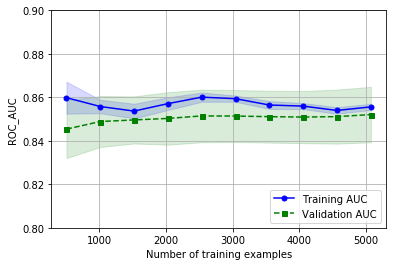

In [29]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
          color='blue', marker='o',
          markersize=5, label='Training AUC')
plt.fill_between(train_sizes,
                  train_mean + train_std,
                  train_mean - train_std,
                  alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
          color='green', linestyle='--',
          marker='s', markersize=5,
          label='Validation AUC')
plt.fill_between(train_sizes,
                  test_mean + test_std,
                  test_mean - test_std,
                  alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('ROC_AUC')
plt.legend(loc='lower right')
plt.ylim([0.8, 0.9])
plt.show()

By the learning curve, our model seems to be OK. If something it can be **underfitting**.

- We could try a more complex model, but risk overfitting
- We could remove the regularization parameter that is on by default on LogisticRegression -> L2 norm
- Looks like our model won't improve if we collect more data

### Next steps
- Explore the data better and try feature engineering
- Tune hyperparameters
- Stacking

Since this is just a practice example, I won't bother much, let's just select the LogisticRegression and end here

In [30]:
final_model = clf_lr.fit(X_train_prepared, y_train)

### Finally testing

In [31]:
X_test = strat_test_set.drop("Churn", axis=1)
y_test = strat_test_set["Churn"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

print(confusion_matrix(y_test, final_predictions))
print(accuracy_score(y_test, final_predictions))
print(roc_auc_score(y_test, final_predictions))

[[743 292]
 [ 73 301]]
0.7409510290986515
0.7613436151799323
